<a href="https://colab.research.google.com/github/yunseobYuk/ML-DL-Learning/blob/main/16_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%A1%9C%EB%8D%94_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터 로더(Data Loader)
* 데이터의 양이 많을 때 Batch 단위로 학습하는 방법

<center><img src='https://i.imgur.com/t83RUtL.png' width='700'></center>


# 2. 손글씨 인식 모델 만들기

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [ ]:
digits = load_digits()

x_data = digits['data']
y_data = digits['target']

print(x_data.shape)
print(y_data.shape)

(1797, 64)
(1797,)


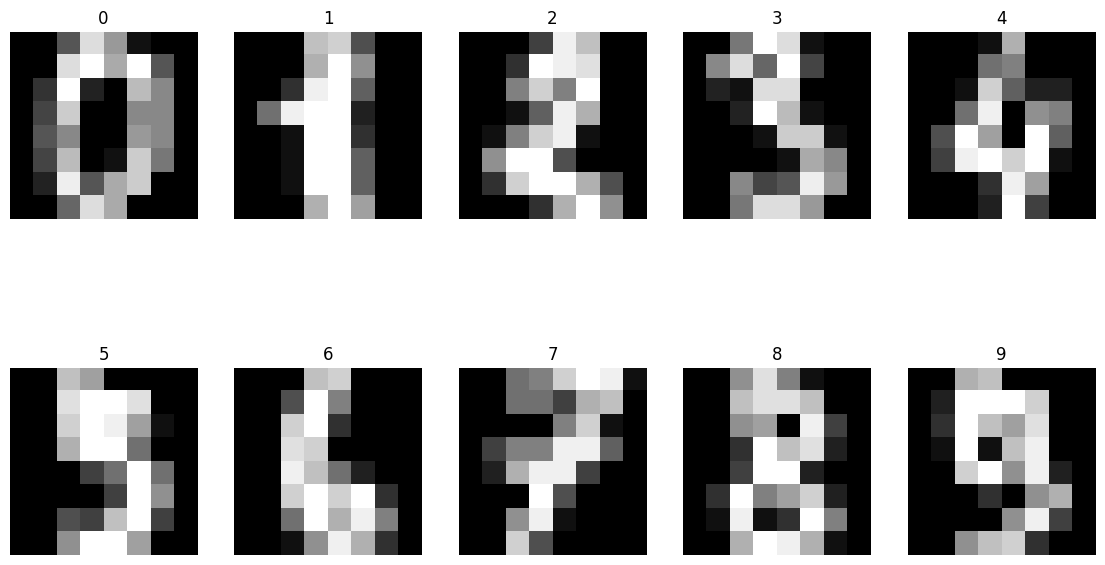

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14,8))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_data[i].reshape((8,8)), cmap='gray')
    ax.set_title(y_data[i])
    ax.axis('off')

In [ ]:
x_data = torch.FloatTensor(x_data)
y_data = torch.LongTensor(y_data)
print(x_data.shape)
print(y_data.shape)

torch.Size([1797, 64])
torch.Size([1797])


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=2024)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

torch.Size([1437, 64]) torch.Size([1437])
torch.Size([360, 64]) torch.Size([360])


# 데이터로더만들기

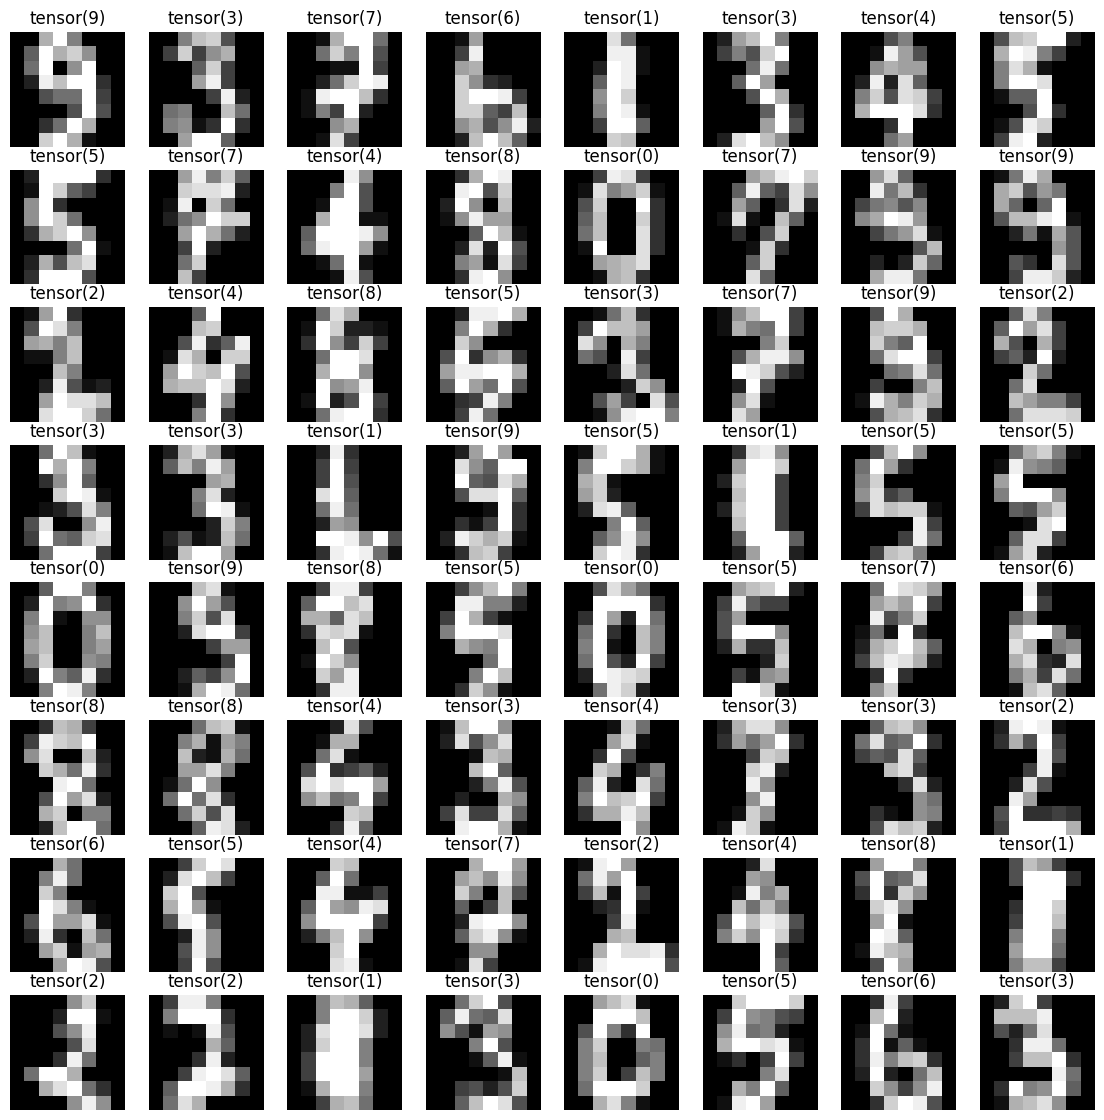

In [ ]:
loader = torch.utils.data.DataLoader(
    dataset = list(zip(x_train, y_train)),
    batch_size=64,
    shuffle = True
    # drop_last=False batch사이즈로 잘라서 학습시킬때 마지막 나머지 제거여부
)

imgs, labels = next(iter(loader))
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(14,14))

for ax, img, label in zip(axes.flatten(), imgs, labels):
    ax.imshow(img.reshape((8,8)), cmap='gray')
    ax.set_title(str(label))
    ax.axis('off')

In [ ]:
# nn.Linear(64, 10) (픽셀수, 결과값)
model = nn.Sequential(nn.Linear(64,10))

# optimizer: Adam( , lr=0.01)
optimizer = optim.Adam(model.parameters(), lr=0.01)
# epochs = 50

epochs = 50

for epoch in range(epochs + 1):
    sum_losses = 0
    sum_accs = 0

    for x_batch, y_batch in loader:
        y_pred = model(x_batch)
        loss = nn.CrossEntropyLoss()(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        sum_losses = sum_losses + loss

        y_prob = nn.Softmax(1)(y_pred)
        y_pred_index = torch.argmax(y_prob, axis=1)
        acc = (y_batch == y_pred_index).float().sum() / len(y_batch) * 100
        sum_accs = sum_accs + acc # accuracy 누적

    avg_loss = sum_losses / len(loader)
    avg_acc = sum_accs / len(loader)
    print(f'Epoch {epoch:4d}/{epochs} Loss: {avg_loss:.6f} Accuracy: {avg_acc:.2f}%')

# Epoch 0/50 Loss: 2.055881 Accuracy: 58.88%

Epoch    0/50 Loss: 1.523062 Accuracy: 64.03%
Epoch    1/50 Loss: 0.226130 Accuracy: 92.97%
Epoch    2/50 Loss: 0.159345 Accuracy: 95.16%
Epoch    3/50 Loss: 0.122766 Accuracy: 96.91%
Epoch    4/50 Loss: 0.110273 Accuracy: 96.73%
Epoch    5/50 Loss: 0.092904 Accuracy: 96.66%
Epoch    6/50 Loss: 0.091393 Accuracy: 97.06%
Epoch    7/50 Loss: 0.081252 Accuracy: 97.28%
Epoch    8/50 Loss: 0.056795 Accuracy: 98.44%
Epoch    9/50 Loss: 0.053534 Accuracy: 98.78%
Epoch   10/50 Loss: 0.048859 Accuracy: 98.64%
Epoch   11/50 Loss: 0.046894 Accuracy: 98.78%
Epoch   12/50 Loss: 0.042476 Accuracy: 98.78%
Epoch   13/50 Loss: 0.037957 Accuracy: 99.12%
Epoch   14/50 Loss: 0.035319 Accuracy: 99.25%
Epoch   15/50 Loss: 0.029851 Accuracy: 99.46%
Epoch   16/50 Loss: 0.029274 Accuracy: 99.39%
Epoch   17/50 Loss: 0.029499 Accuracy: 99.44%
Epoch   18/50 Loss: 0.027099 Accuracy: 99.52%
Epoch   19/50 Loss: 0.022902 Accuracy: 99.59%
Epoch   20/50 Loss: 0.026912 Accuracy: 99.46%
Epoch   21/50 Loss: 0.024107 Accur

tensor(7)


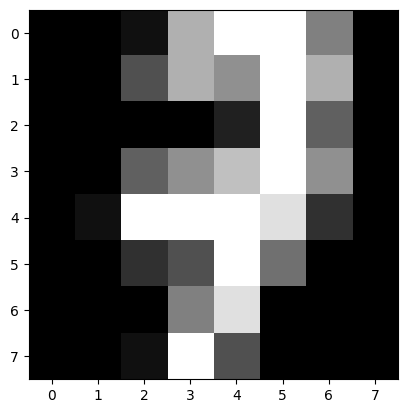

In [ ]:
plt.imshow(x_test[10].reshape((8,8)), cmap='gray')
print(y_test[10])

In [ ]:
y_pred = model(x_test)
y_pred[10]

tensor([ -9.8469,  -0.9072, -14.4978,  -2.3878,  -2.8066,  -6.2015, -11.5884,
         12.3181,   0.4305,   1.9054], grad_fn=<SelectBackward0>)

In [ ]:
y_prob = nn.Softmax(1)(y_pred)
y_prob[10]

tensor([2.3649e-10, 1.8043e-06, 2.2592e-12, 4.1046e-07, 2.7002e-07, 9.0577e-09,
        4.1447e-11, 9.9996e-01, 6.8747e-06, 3.0045e-05],
       grad_fn=<SelectBackward0>)

In [ ]:
for i in range(10):
    print(f'숫자 {i}일 확률: {y_prob[10][i]:.2f}')

숫자 0일 확률: 0.00
숫자 1일 확률: 0.00
숫자 2일 확률: 0.00
숫자 3일 확률: 0.00
숫자 4일 확률: 0.00
숫자 5일 확률: 0.00
숫자 6일 확률: 0.00
숫자 7일 확률: 1.00
숫자 8일 확률: 0.00
숫자 9일 확률: 0.00


In [ ]:
y_pred_index = torch.argmax(y_prob, axis=1)
accuracy = (y_test == y_pred_index).float().sum() / len(y_test) * 100
print(f'테스트 정확도는 {accuracy: .2f}% 입니다.')

테스트 정확도는  95.28% 입니다.


# 99. 필기
1. drop_last=False, # batch사이즈로 잘라서 학습시킬때 마지막 나머지 제거여부